In [1]:
from pynq import Overlay


In [2]:
ol = Overlay("ifft.bit")

In [3]:
ol?

In [4]:
data_channel = ol.ifft_block.ifft_dma_0

In [5]:
data_channel?

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
samples =8
T = 1
T = np.linspace(0,T, samples)

In [8]:
data = np.array([0,1,2,2,1,0,1,2],dtype = np.csingle)

In [21]:
%%time 
golden_output = np.fft.ifft(data)

CPU times: user 0 ns, sys: 6.2 ms, total: 6.2 ms
Wall time: 8.78 ms


In [18]:
freq = np.fft.fftfreq(samples)
freq

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

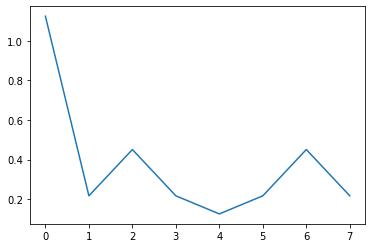

In [11]:
plt.plot(np.abs(golden_output))

In [12]:
from pynq import allocate

In [13]:
input_buffer = allocate((8,),np.csingle)
output_buffer = allocate((8,),np.csingle)

In [14]:
send_channel = data_channel.sendchannel
recv_channel = data_channel.recvchannel

In [15]:
np.copyto(input_buffer,data)

In [24]:
%%time
send_channel.transfer(input_buffer)
recv_channel.transfer(output_buffer)
send_channel.wait()
recv_channel.wait()

CPU times: user 4.71 ms, sys: 0 ns, total: 4.71 ms
Wall time: 4.31 ms


In [25]:
output= np.array([0]*8,dtype=np.cdouble)
np.copyto(output,output_buffer)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


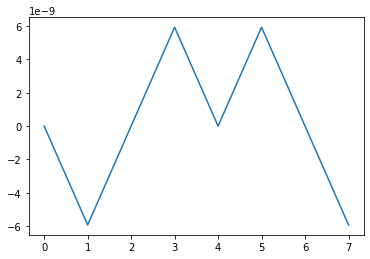

In [26]:
plt.plot(golden_output-output/8)

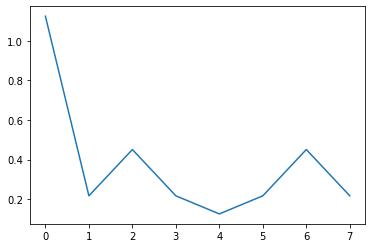

In [27]:
plt.plot(np.abs(output/8))